In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\lENOVO\OneDrive\Desktop\Udemy Machine Learning\Projects\Medical Insurance\medical_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(2772, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

In [8]:
df['children'].value_counts()

0    1186
1     672
2     496
3     324
4      52
5      42
Name: children, dtype: int64

In [9]:
df['smoker'].value_counts()

no     2208
yes     564
Name: smoker, dtype: int64

In [10]:
df['sex'].value_counts()

male      1406
female    1366
Name: sex, dtype: int64

C:\Users\lENOVO\AppData\Local\Temp\ipykernel_5808\3056783724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']), kde = True,color='r')


<Axes: xlabel='charges', ylabel='Density'>

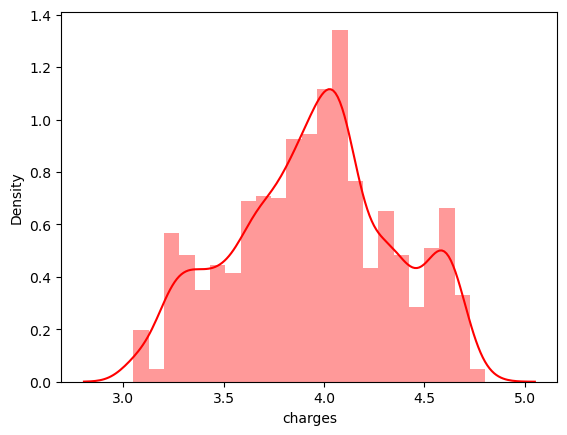

In [11]:
sns.distplot(np.log10(df['charges']), kde = True,color='r')

<Axes: xlabel='age', ylabel='Count'>

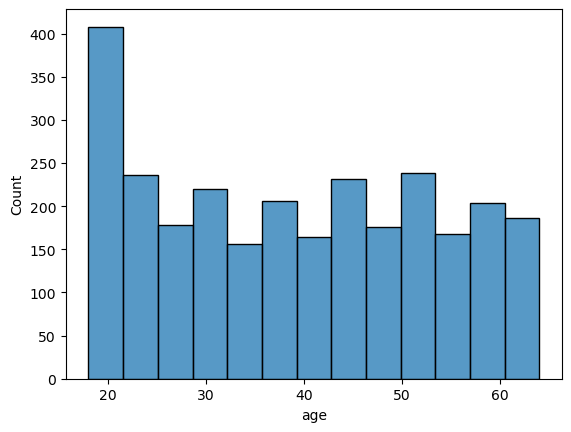

In [12]:
sns.histplot(x='age',data=df,kde=False)

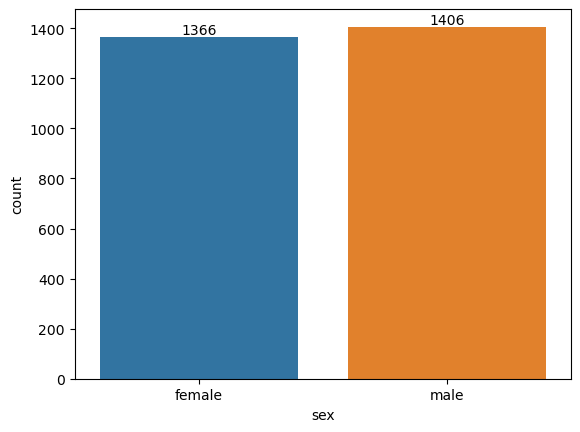

In [13]:
ax=sns.countplot(x='sex',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='bmi', ylabel='Count'>

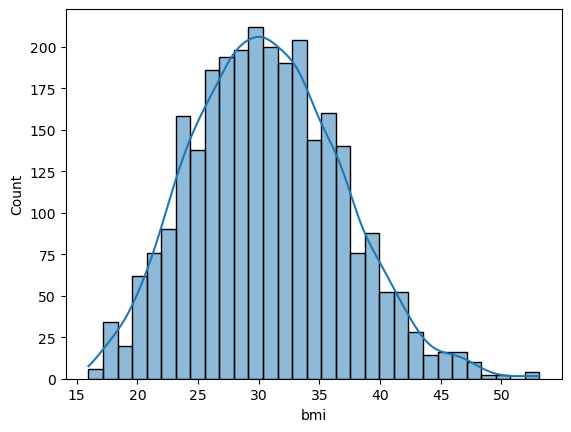

In [14]:
sns.histplot(x='bmi',data=df,kde=True)

In [ ]:
ax = sns.countplot(x='children',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
ax = sns.countplot(x='smoker',hue='sex',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
ax = sns.countplot(x='region',hue='sex',data=df)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
ax = sns.countplot(x='region',hue='smoker',data=df)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

for bars in ax.containers:
    ax.bar_label(bars)

### Model Execution

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame to preserve the original data
data_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
data_encoded['sex'] = label_encoder.fit_transform(df['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])
data_encoded['region'] = label_encoder.fit_transform(df['region'])

# Display the first few rows of the encoded DataFrame
print("Encoded DataFrame:")
print(data_encoded.head())
print("\n")

# Now the changes are permanent in the 'data_encoded' DataFrame

# If you want to make the changes permanent in the original DataFrame 'data', you can do:
df[['sex', 'smoker', 'region']] = data_encoded[['sex', 'smoker', 'region']]

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Mean Squared Error (Random Forest):", rf_mse)

In [ ]:
# Plot actual vs. predicted charges for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()

# Plot actual vs. predicted charges for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Random Forest)')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,rf_predictions)

In [ ]:
r2_score(y_test,lr_predictions)